### [Problem 1] Obtaining a dataset

In [1]:
import math
import missingno

import pandas as pd
import numpy as np

import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


df = pd.read_csv('train.csv', sep=",")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### [Problem 2] Investigating the dataset itself


- THIS dataset has information about different type of houses located in Ames city where by there are different terrains and different neighborhoods. These features have an impact on why someone chooses a specific house in the city and how the price of the house is affected by those features.
> The Goal: 
- It is to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 
> Could be either
- sale price, pool area, yearbuilt, all the exterior(like:street or general zoning classification and interior features are included)


### [Problem 3] Checking the data

In [2]:
#See what each feature is about. (Numerical data or text data, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
#Check which column is the target variable this time.

#Since Goal is sale price for each house. Hence, SalePrice is the dependent Variable
target = df['SalePrice'].describe()
target

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


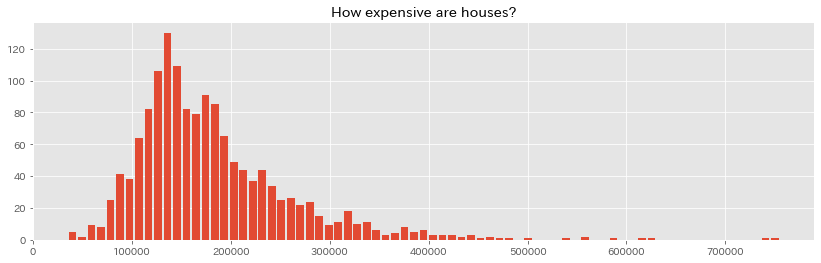

In [4]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df.SalePrice.min(), df.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    df.SalePrice.mean(), df.SalePrice.median()))
df.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are houses?')
plt.show()

In [5]:
# separating categorical and numerical data

def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = df.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

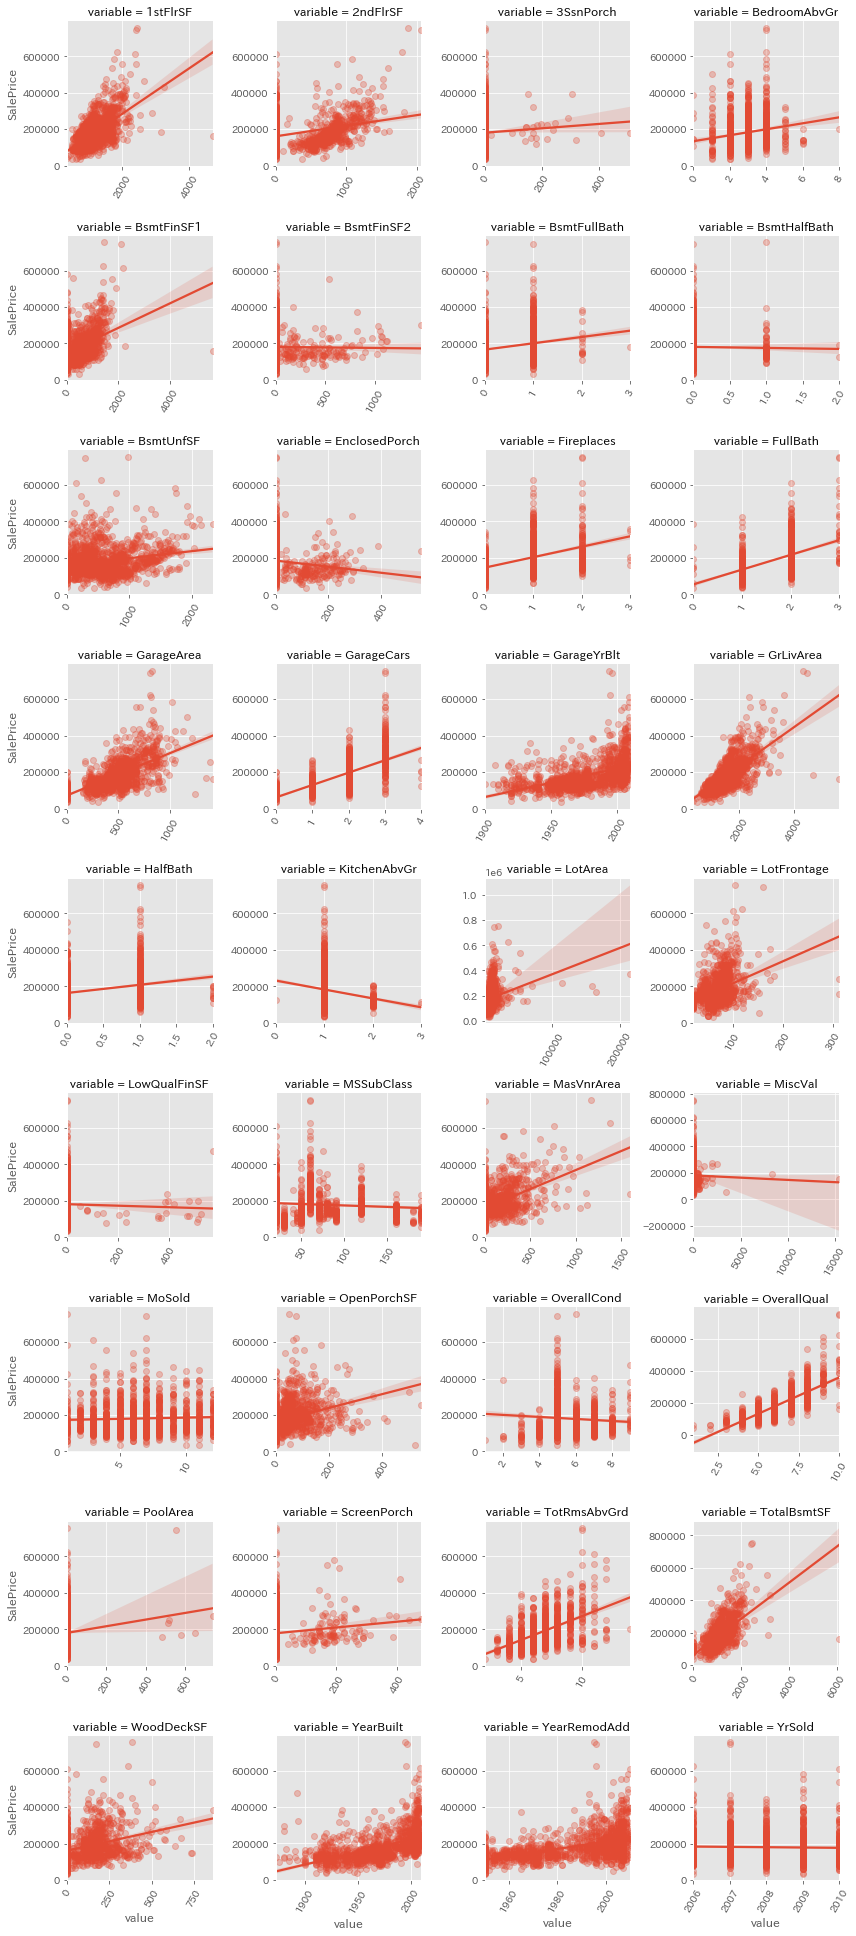

In [6]:
#Checking numerical  data against target variable
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()


/Users/prown/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


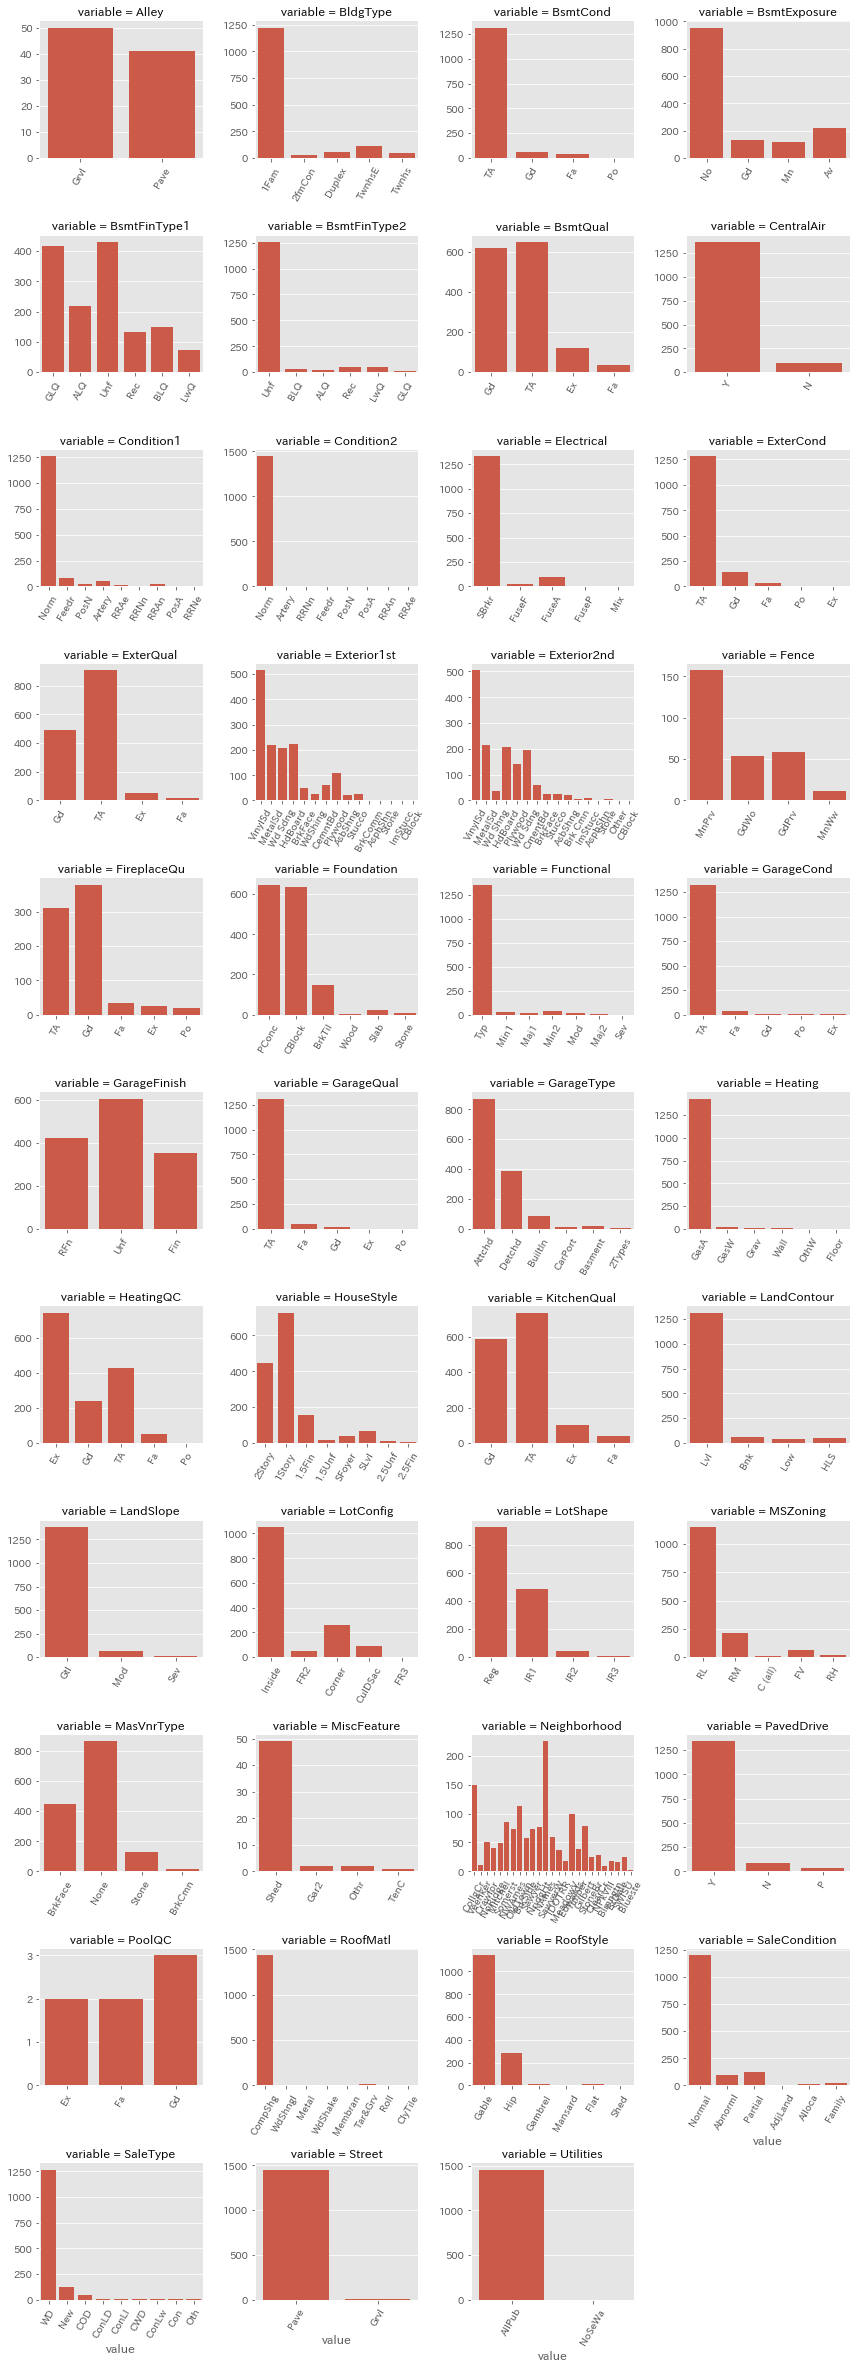

In [7]:
#Checking categorical data

f = pd.melt(df, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [8]:
#Display the mean, standard deviation, and quartiles of the feature values at once.
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### [Problem 4] Dealing with missing values

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
#Check the precentage of missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)


Your selected dataframe has 81 columns and 1460 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
PoolQC,0,1453,99.5,object
MiscFeature,0,1406,96.3,object
Alley,0,1369,93.8,object
Fence,0,1179,80.8,object
FireplaceQu,0,690,47.3,object
LotFrontage,0,259,17.7,float64
GarageType,0,81,5.5,object
GarageYrBlt,0,81,5.5,float64
GarageFinish,0,81,5.5,object
GarageQual,0,81,5.5,object


In [18]:
# Delete features (columns) that have 5 or more missing values.
mod_df = df.dropna( thresh=5 )
print("Modified Dataframe : ")
print(mod_df)

Modified Dataframe : 
        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  .

In [19]:
mod_df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


### [Problem 5] Researching terminology


> #### Kurtosis:
- Kurtosis is nothing but the flatness or the peakness of a distribution curve. 
- The kurtosis for a standard normal distribution is three. 
- Excess Kurtosis, definition is used so that the standard normal distribution has a kurtosis of zero. 
- In addition, with the second definition positive kurtosis indicates a "heavy-tailed" distribution and 
- negative kurtosis indicates a "light tailed" distribution.
- A curve having relatively higher peak than the normal curve is known as leptokurtic. 
- If the curve is more flat-topped than the normal curve then it is called platykurtic. And a normal curve is called itself as mesokurtic.

> #### skewness:
- The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. 
- Negative values for the skewness indicate data that are skewed left and 
- positive values for the skewness indicate data that are skewed right. 
- By skewed left, we mean that the left tail is long relative to the right tail. 
- Similarly, skewed right means that the right tail is long relative to the left tail. 
- If the data are multi-modal, then this may affect the sign of the skewness.


### [Problem 6] Confirming distribution

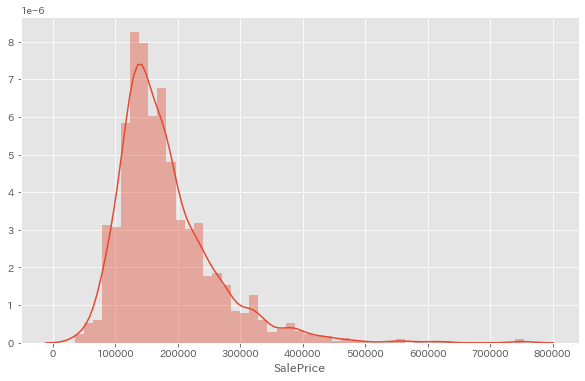

In [20]:
#Use seaborn'sns.distplot () to display the distribution of the target variable and also calculate the "kurtosis" and "skewness".
plt.figure(figsize=(10,6))
sns.distplot(df.SalePrice)
plt.show()

- We see that SalePrice is positively skewed, and "peaky" with fat tails, or outliers, namely to the right

In [21]:
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    df.SalePrice.skew(), df.SalePrice.kurtosis()))

Skew: 1.883 | Kurtosis: 6.536


In [22]:
#Perform a logarithmic transformation on the objective variable.

# log transform any numerical feature with a skew greater than 0.5

features = num_features + ['SalePrice']
for f in features:
    df.loc[:,f] = np.log1p(df[f])
    



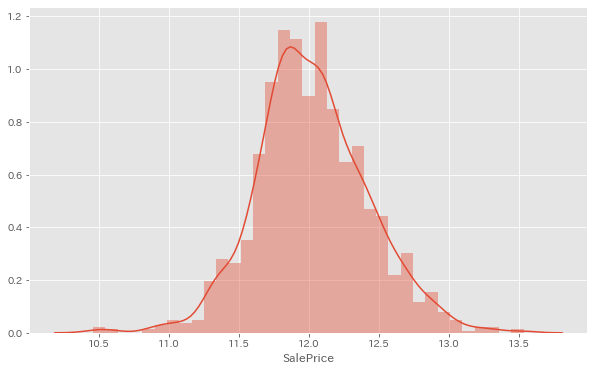

In [23]:
#The distribution is displayed for the logarithmically transformed one, and the "kurtosis" and "skewness" are also calculated.
plt.figure(figsize=(10,6))
sns.distplot(df.SalePrice)
plt.show()

In [24]:
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    df.SalePrice.skew(), df.SalePrice.kurtosis()))

Skew: 0.121 | Kurtosis: 0.810



#### Please explain the change before and after logarithmic transformation, including the term "normal distribution". 

> ##### Answer:

 - Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset.
 
-  Before log_transformation: The data are right-skewed; there are more inexpensive houses than expensive ones.
- After log_transformation: The data achieved some lineality. Since Normal distribution has 0 skewness. Hence we could say the data is Normally distributed. 
- And for the case of kurtosis after log_transformation, since the kurtosis is close to zero. Indicating a standard normal distribution of excess Kurtosis.

### [Problem 7] Confirming the correlation coefficient


<AxesSubplot:>

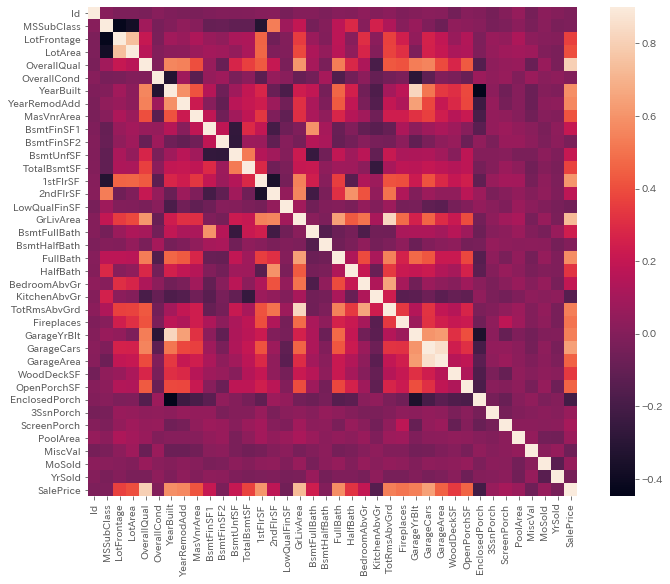

In [46]:
#Create a heat map of the correlation coefficient matrix and find the relationships with high correlation coefficients

df_corr = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(df_corr, vmax=0.9, square=True)


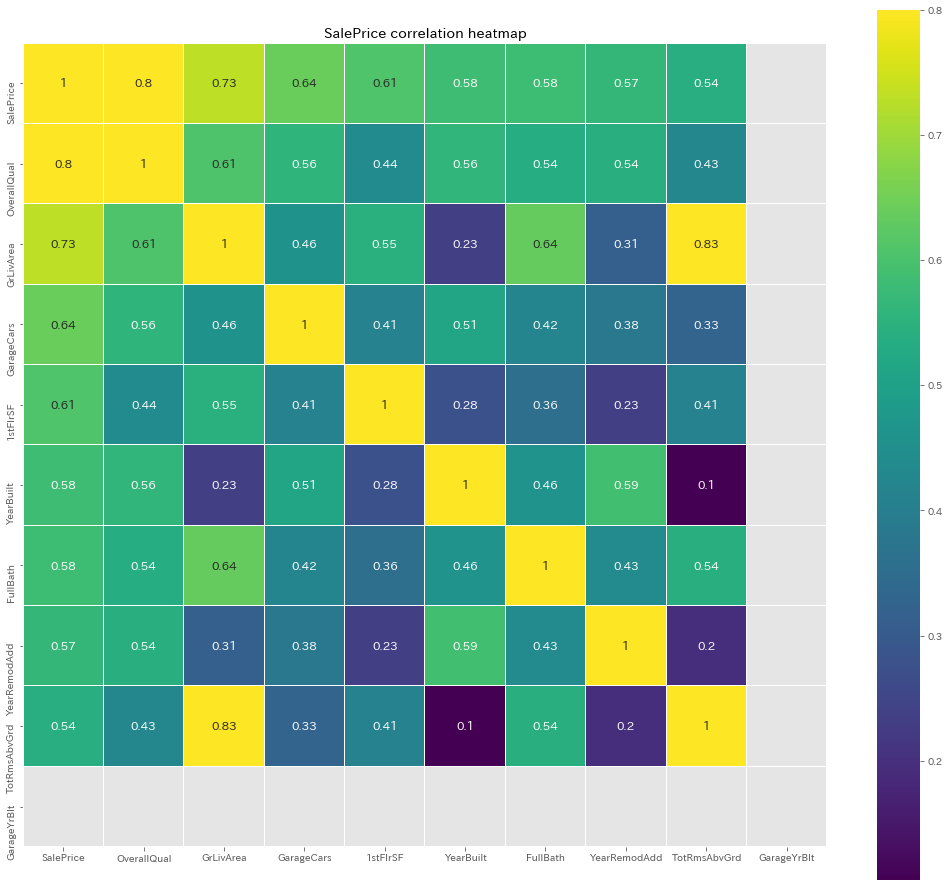

In [34]:
#Select 10 features that have a high correlation with the target variable, and create a correlation coefficient matrix heat map for these.

# Heatmap of positive correlation features
import seaborn as sns
correlation = df.corr()
k = len([i for i in correlation['SalePrice'] if abs(i) >= 0.52])
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (18,16))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
ax.set_title('SalePrice correlation heatmap')
plt.show()
my_cols = list(cols)
if "SalePrice" in my_cols:
    my_cols.remove("SalePrice")


#### Summarize whether the 10 selected features represent something by referring to the description in Kaggle's DataDescription.

Comment: 
- We immediately see that "OverallQual" (overall quality, an integer categorical variable) and "GrLivArea" (above ground living area square footage) have the strongest correlations with "SalePrice". Additionally, we see that independent variables are highly correlated.
- Importantly are the year the garage was built, the year the house was remodeled, and the year the house was built. 
- The strong correlation will make it harder to harness the information contained in these variables. Regularization could also just eliminate strongly correlated variables through feature selection. Finally we can locate variables that are likely completely degenerate, particularly the number of cars that fit in the the garage and the square footage of the garage.

In [ ]:
# Find 3 combinations of the 10 selected features that have high correlation coefficients with each other.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

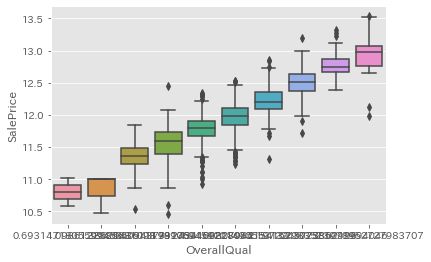

In [40]:
sns.boxplot(df['OverallQual'], df['SalePrice'])

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

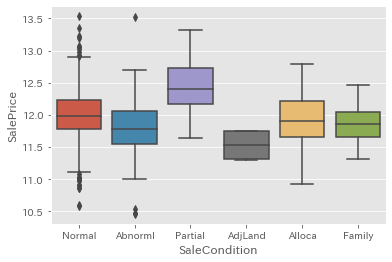

In [42]:
sns.boxplot(df['SaleCondition'], df['SalePrice'])

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

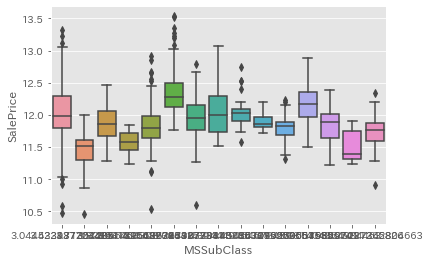

In [44]:
sns.boxplot(df['MSSubClass'], df['SalePrice'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

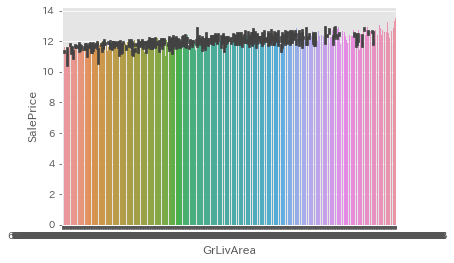

In [43]:
sns.barplot(df['GrLivArea'], df['SalePrice'])